In [6]:
import pandas as pd
import numpy as np
import sys
import geopandas as gpd
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from shapely.geometry import Polygon
sys.path.append("../mobility_data_analysis/")
# import mobility as mbl
from python_mobility import parameters as mp
from python_mobility import analysis as ma

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from matplotlib.colors import TwoSlopeNorm, LogNorm 
import matplotlib.ticker as mticker

In [7]:
%run ./python_mobility/parameters.py
cluster_name

{0: 'Grocery stores and pharmacies',
 1: 'General retail',
 2: 'Arts and entertainment venues',
 3: 'Restaurants and bars',
 4: 'Educational settings',
 5: 'Healthcare facilities',
 6: 'others'}

In [8]:
visits_scores_wk = pd.read_csv('../data/unpivot_merged_data_raw_1to1_s.csv')

In [9]:
visits_scores_wk.head()

,MODZCTA,mod_idx,week,Grocery&Pharmacies_visits_weekly,Retails_visits_weekly,Arts&Entertainment_visits_weekly,Restaurants&Bars_visits_weekly,Educations_visits_weekly,Healthcares_visits_weekly,others_visits_weekly,...,StringencyIndex_WeightedAverage,longitude,latitude,Grocery&Pharmacies_visits_weekly_lag1,Retails_visits_weekly_lag1,Arts&Entertainment_visits_weekly_lag1,Restaurants&Bars_visits_weekly_lag1,Educations_visits_weekly_lag1,Healthcares_visits_weekly_lag1,others_visits_weekly_lag1
0,10001,84,0,164.365268,560.761233,812.040092,1083.905893,95.795233,172.195810,367.039754,...,67.991429,985043.10518,212772.631903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,84,1,124.859090,286.652967,448.452121,822.768160,87.718431,145.520356,259.145650,...,82.410000,985043.10518,212772.631903,164.365268,560.761233,812.040092,1083.905893,95.795233,172.195810,367.039754
2,10001,84,2,156.519706,463.791262,1491.622289,1356.599168,68.740346,109.211293,395.953114,...,82.410000,985043.10518,212772.631903,124.859090,286.652967,448.452121,822.768160,87.718431,145.520356,259.145650
3,10001,84,3,150.561542,398.489859,659.337233,824.477318,67.123965,89.384435,254.628956,...,82.410000,985043.10518,212772.631903,156.519706,463.791262,1491.622289,1356.599168,68.740346,109.211293,395.953114
4,10001,84,4,95.130766,308.652001,574.339694,776.248681,63.824066,101.186536,277.838476,...,82.410000,985043.10518,212772.631903,150.561542,398.489859,659.337233,824.477318,67.123965,89.384435,254.628956


Grocery&Pharmacies
22.82142176481799
3147.1796735899006
Retails
66.02865581169479
5822.87737573808
Arts&Entertainment
106.0692893603308
4128.996107926301
Restaurants&Bars
276.8553157861965
7941.661556477568
Educations
26.231741573033712
999.149107453778
Healthcares
35.90135051204235
2640.604460424766


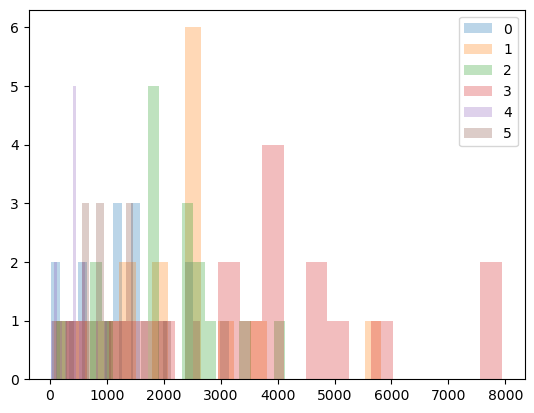

In [4]:
for c in range(6):
        c_name = mp.cluster_name0[c]
        col_name = c_name+'_visits_weekly'
        visits_scores_wk[col_name] = visits_scores_wk[c_name+'_visits_weekly']
        #### for per pop 
        # visits_scores_wk[col_name] = (visits_scores_wk[c_name+'_visits_weekly']/visits_scores_wk['Population'])*100
        plt.hist(visits_scores_wk[visits_scores_wk['week']==0][col_name], bins=20, alpha =0.3, label=c)
        print (c_name)
        print (np.min(visits_scores_wk[visits_scores_wk['week']==0][col_name]))
        print (np.max(visits_scores_wk[visits_scores_wk['week']==0][col_name]))
plt.legend()

In [6]:
gdf = gpd.read_file('../Data/geography_data/MODZCTA_2010.shp')
gdf['MODZCTA'] = gdf['MODZCTA'].astype(np.int64)
gdf_merged = gdf.merge(visits_scores_wk, on='MODZCTA', how='left')

### scores

*scatter Polt*

(20000.0, 110000.0)

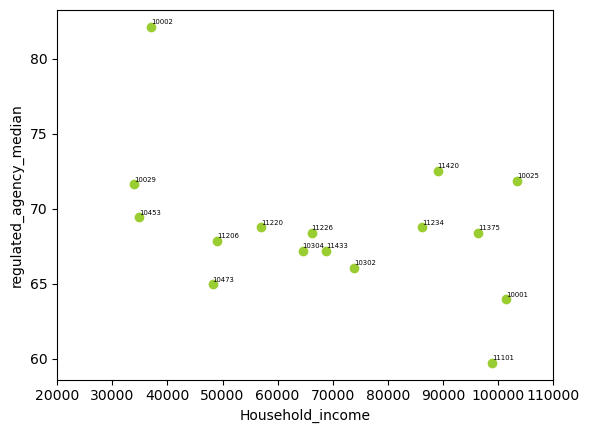

In [82]:
x = gdf_merged[gdf_merged['week']==0]['Household_income'].values
y = gdf_merged[gdf_merged['week']==0]['regulated_agency_median'].values
labels = gdf_merged[gdf_merged['week']==0]['MODZCTA'].values
# figure = plt.figure(figsize=(2, 2.5), dpi=350)
plt.scatter(x, y,c='yellowgreen')
for i in range(len(x)):
    plt.text(x[i], y[i]+ 0.1, labels[i], fontsize=5, ha='left', va='bottom')

plt.xlabel('Household_income')
plt.ylabel('regulated_agency_median')
# plt.xlim(20000, 110000)
# plt.xscale('log')

### scores of all the surevy collected

In [6]:
modzcta_scores = pd.read_csv('../results/scores/modzcta_scores.csv') #modzcta_scores
gdf = gpd.read_file('../Data/geography_data/MODZCTA_2010.shp')
gdf['MODZCTA'] = gdf['MODZCTA'].astype(np.int64)
gdf_merged = gdf.merge(modzcta_scores, on='MODZCTA', how='left')

In [7]:
gdf.columns

Index(['MODZCTA', 'label', 'geometry'], dtype='object')

In [8]:
used_mod = visits_scores_wk['MODZCTA'].unique()
highlight_indices = gdf_merged.index[gdf_merged['MODZCTA'].isin(used_mod)].tolist()
highlight_gdf = gdf_merged.iloc[highlight_indices]

In [7]:
len(used_mod)

17

In [8]:
gdf_merged.columns

Index(['MODZCTA', 'label', 'geometry', 'score_mean', 'score_median',
       'score_std', 'gain_bias_mean', 'gain_bias_median', 'gain_bias_std',
       'loss_bias_mean', 'loss_bias_median', 'loss_bias_std',
       'loss_aversion_scores_mean', 'loss_aversion_scores_median',
       'loss_aversion_scores_std', 'rescale_avail_mean',
       'rescale_avail_median', 'rescale_avail_std', 'rescale_realistic_mean',
       'rescale_realistic_median', 'rescale_realistic_std', 'agency_mean',
       'agency_median', 'agency_std', 'regulated_tdscores_mean',
       'regulated_tdscores_median', 'regulated_tdscores_std',
       'regulated_agency_mean', 'regulated_agency_median',
       'regulated_agency_std', 'regulated_loss_mean', 'regulated_loss_median',
       'regulated_loss_std', 'modzcta_count'],
      dtype='object')

regulated_tdscores_median
regulated_loss_median
regulated_agency_median


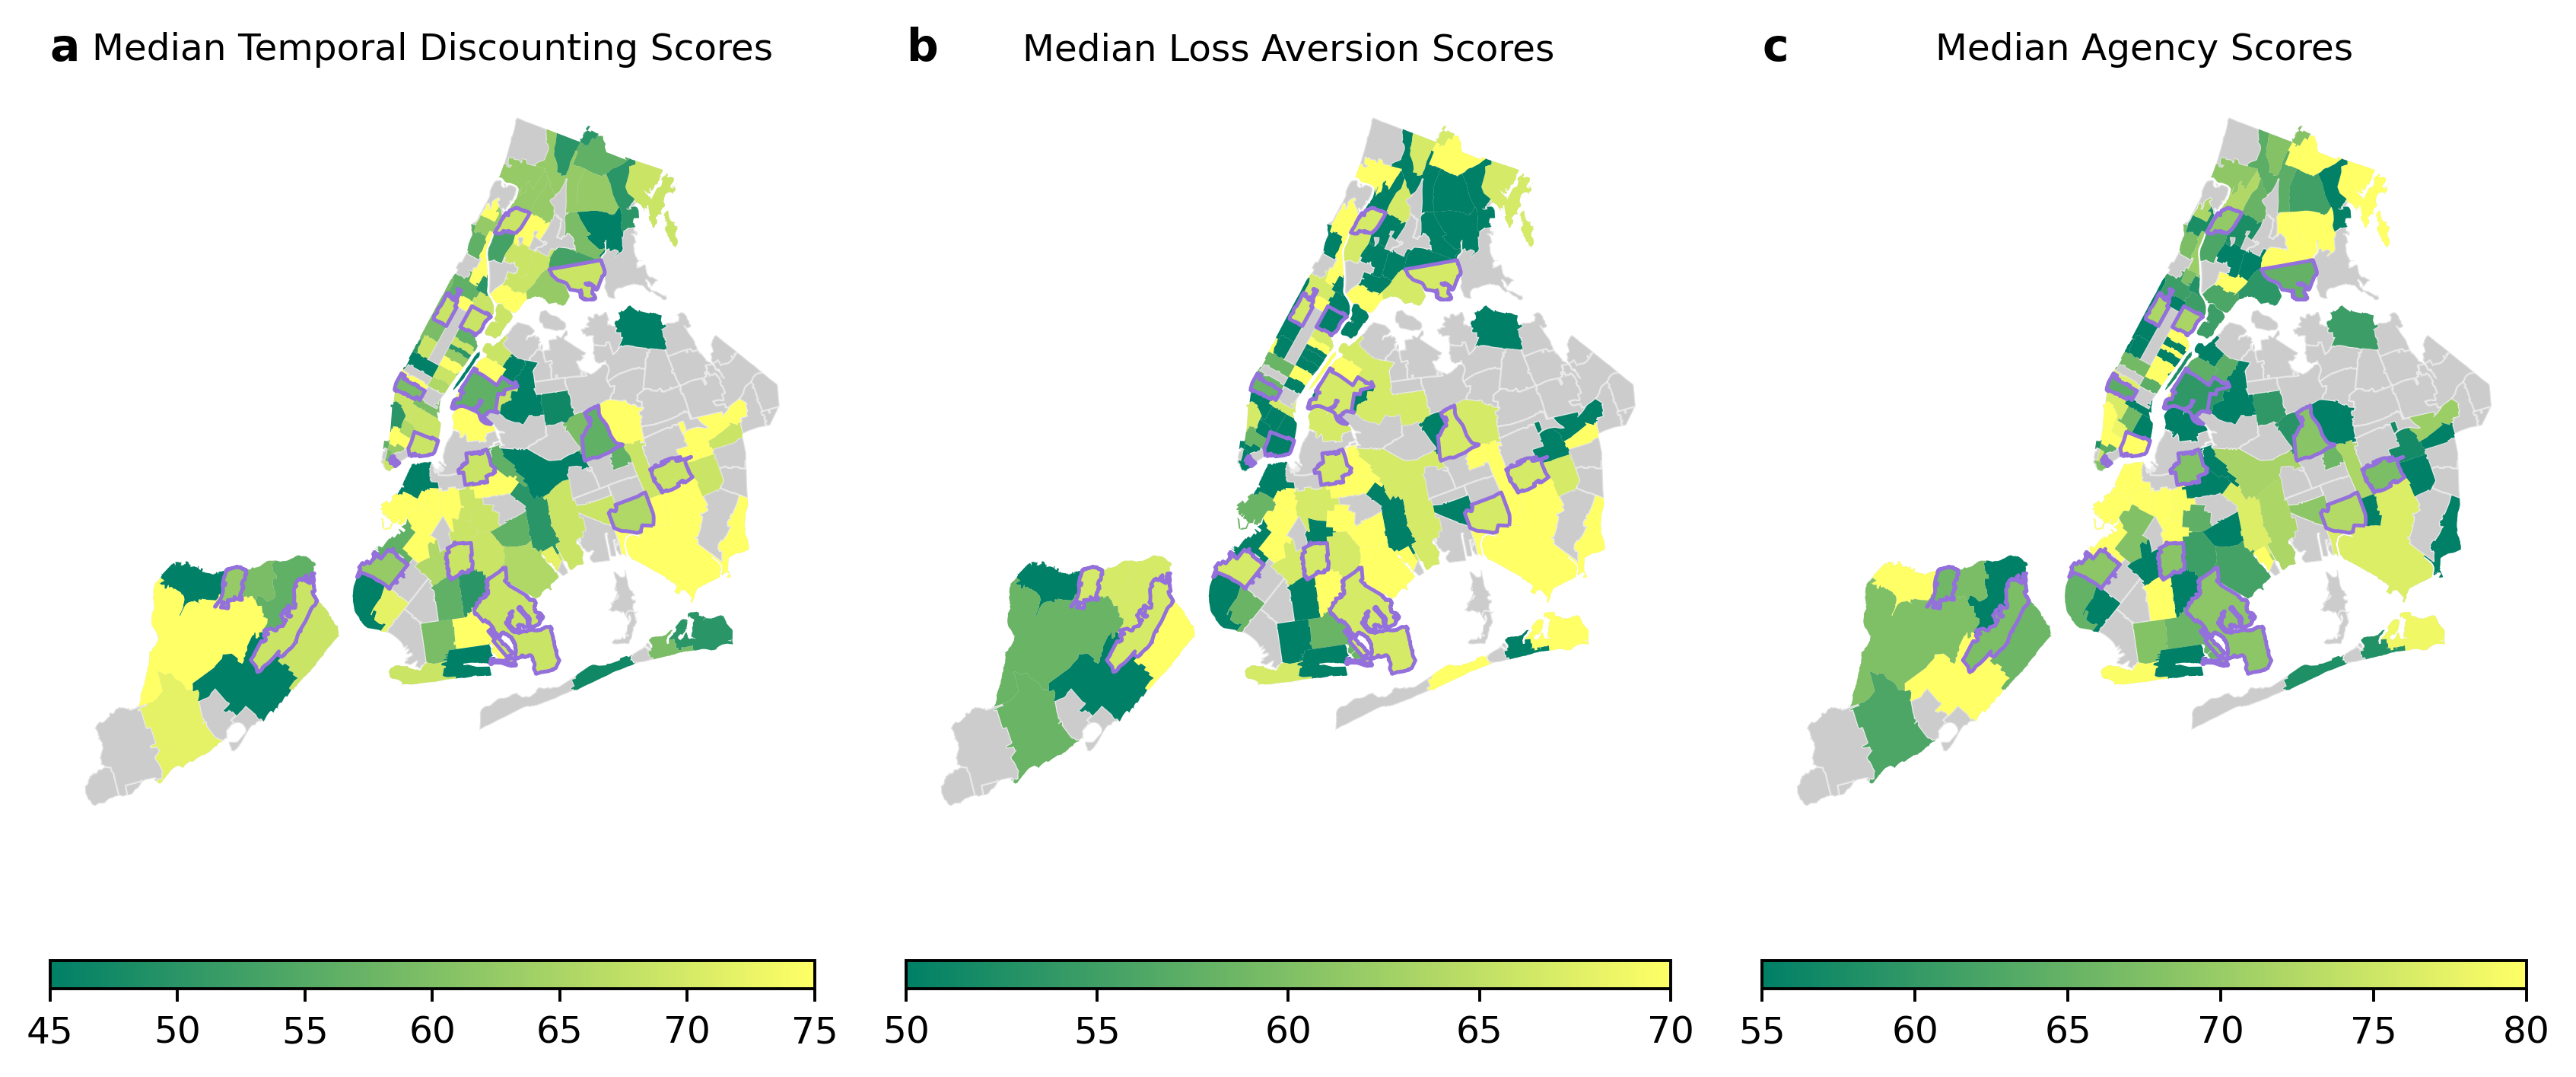

In [9]:
dpi = 350
figsize = (12, 5)  # inches
scores_title_dict1 = {'regulated_tdscores_median':'a', 'regulated_loss_median':'b', 'regulated_agency_median':'c'}
scores_title_dict2 = {'regulated_tdscores_median':'Median Temporal Discounting Scores', 'regulated_loss_median':'Median Loss Aversion Scores', 'regulated_agency_median':'Median Agency Scores'}

fig = plt.figure(figsize=figsize,dpi = dpi)  
# gs = gridspec.GridSpec(1, 3, height_ratios=[1], hspace=0.3, wspace=0.1)
gs = gridspec.GridSpec(2, 3, height_ratios=[35, 1], hspace=0., wspace=0.12)  # Adjust height_ratios for plot to colorbar
vmax_min_dic = {'regulated_tdscores_median':(45,
75), 'regulated_loss_median':(50,70), 'regulated_agency_median':(55,80)}

for idx, (k,v) in enumerate(scores_title_dict1.items()):
    print (k)
    ax = fig.add_subplot(gs[0, idx])
    gdf.plot(ax=ax, color='grey', alpha=0.4, edgecolor='white',linewidth=0.5)
    
    vmin = vmax_min_dic[k][0]
    vmax = vmax_min_dic[k][1]
    norm = Normalize(vmin=vmin, vmax=vmax)
    # norm = Normalize()
    cmap = mpl.cm.summer # PRGn
    mapping = gdf_merged.plot(column=k, cmap=cmap,legend=False,  norm = norm, ax=ax)
    
    cax = fig.add_subplot(gs[1, idx])
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    plt.colorbar(sm, cax=cax, orientation='horizontal')
    ## Highlight the modzcta
    highlight_gdf.plot(ax=ax, color='none', edgecolor='mediumpurple', linewidth=1)
    ##
    ax.set_title(v,fontsize=12, fontweight='bold',loc='left')
    ax.text(0.5, 1.02, scores_title_dict2[k], fontsize=10, transform=ax.transAxes,ha='center', va='bottom')
    ax.axis('off')

filename = f'../results/plots_maps/scores_png/scores.png'
plt.savefig(filename, bbox_inches='tight',pad_inches=0,dpi=dpi)
# plt.close()